In [1]:
import pandas as pd

# Load the wide analytics table
df = pd.read_parquet('../etl_output/combined.parquet')

# Show all columns in the output
pd.set_option('display.max_columns', None)

# Display the first few rows
print(df.head())

# Show DataFrame info (types, nulls, etc.)
print(df.info())

# Print the full list of columns
print('Columns:', list(df.columns))

                                     id                title  \
0  11e41910-a77c-4818-b073-28019b0fbc92                  nan   
1  638ab4a6-e8de-4e0e-8ecb-b1497e071029    drink 3l of water   
2  078c7e60-4a7c-433e-997a-7a68705badd2  sleep 8 hours a day   
3  e9ea2b3f-5998-4904-b956-4cb3af58c194                  nan   
4  69649cff-7f36-4098-9a2b-1f12d85496c0              get out   

                         description     status priority  \
0                                nan     active      nan   
1                                           nan      nan   
2                                           nan      nan   
3  notify step for manager to review     Active      nan   
4                                     Completed     High   

                         created_at                        updated_at  \
0  2025-04-26 18:51:56.011229+00:00  2025-05-30 10:10:02.794436+00:00   
1  2025-04-26 18:58:31.504303+00:00  2025-05-30 09:49:00.055068+00:00   
2  2025-04-26 18:58:38.360554+00:00

In [2]:
import duckdb

# Connect to DuckDB and fetch a sample
con = duckdb.connect('../etl_output/analytics.duckdb')
df_duck = con.execute('SELECT * FROM user_events LIMIT 10').fetchdf()

# Show all columns
pd.set_option('display.max_columns', None)

# Display the first few rows
print(df_duck.head())

# Show DataFrame info
print(df_duck.info())

# Print the full list of columns
print('Columns:', list(df_duck.columns))

                                     id                title  \
0  11e41910-a77c-4818-b073-28019b0fbc92                  nan   
1  638ab4a6-e8de-4e0e-8ecb-b1497e071029    drink 3l of water   
2  078c7e60-4a7c-433e-997a-7a68705badd2  sleep 8 hours a day   
3  e9ea2b3f-5998-4904-b956-4cb3af58c194                  nan   
4  69649cff-7f36-4098-9a2b-1f12d85496c0              get out   

                         description     status priority  \
0                                nan     active      nan   
1                                           nan      nan   
2                                           nan      nan   
3  notify step for manager to review     Active      nan   
4                                     Completed     High   

                         created_at                        updated_at  \
0  2025-04-26 18:51:56.011229+00:00  2025-05-30 10:10:02.794436+00:00   
1  2025-04-26 18:58:31.504303+00:00  2025-05-30 09:49:00.055068+00:00   
2  2025-04-26 18:58:38.360554+00:00

In [3]:
# Show summary statistics for new time features
if 'hour_of_day' in df.columns:
    print('Hour of Day:', df['hour_of_day'].describe())
if 'is_weekend' in df.columns:
    print('Is Weekend:', df['is_weekend'].value_counts())
if 'month' in df.columns:
    print('Month:', df['month'].value_counts())
if 'year' in df.columns:
    print('Year:', df['year'].value_counts())
if 'day_of_week' in df.columns:
    print('Day of Week:', df['day_of_week'].value_counts())

Hour of Day: count    66.000000
mean     10.030303
std       6.777723
min       0.000000
25%       3.250000
50%       9.000000
75%      16.000000
max      23.000000
Name: hour_of_day, dtype: float64
Is Weekend: is_weekend
False    58
True      8
Name: count, dtype: int64
Month: month
5    63
4     3
Name: count, dtype: int64
Year: year
2025    66
Name: count, dtype: int64
Day of Week: day_of_week
Tuesday      29
Monday       18
Saturday      6
Friday        6
Wednesday     3
Sunday        2
Thursday      2
Name: count, dtype: int64


In [4]:
if 'event_type' in df.columns:
    print('Event Types:', df['event_type'].unique())
if 'source' in df.columns:
    print('Sources:', df['source'].unique())

Event Types: ['user_event' 'habit_event' 'project_event' 'task_event' 'cost_event'
 'ai_model_event' 'streaming_request' 'conversation_event' 'journal_event']
Sources: ['user' 'habit' 'project' 'task' 'cost_tracking' 'ai_model' 'ai_log'
 'conversation' 'journal']


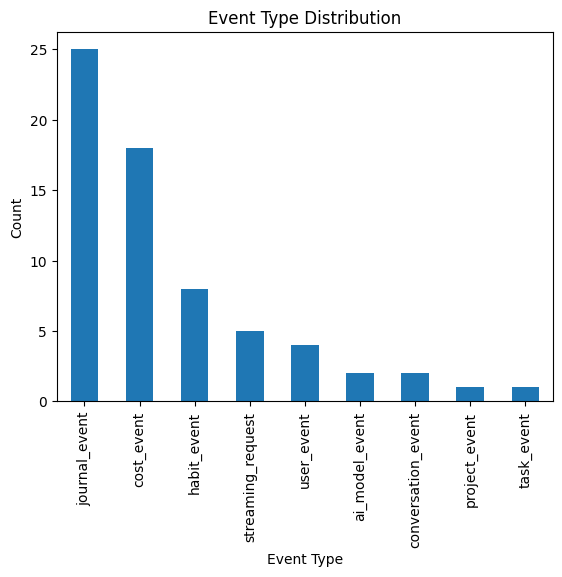

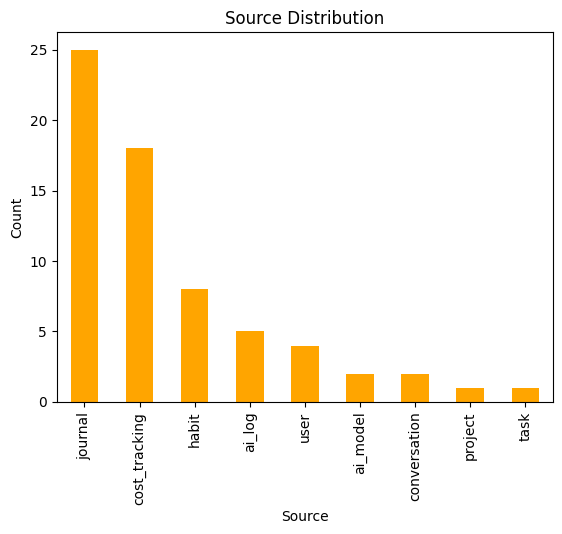

In [5]:
import matplotlib.pyplot as plt

# Event type distribution
df['event_type'].value_counts().plot(
    kind='bar', title='Event Type Distribution')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.show()

# Source distribution
df['source'].value_counts().plot(
    kind='bar', title='Source Distribution', color='orange')
plt.xlabel('Source')
plt.ylabel('Count')
plt.show()

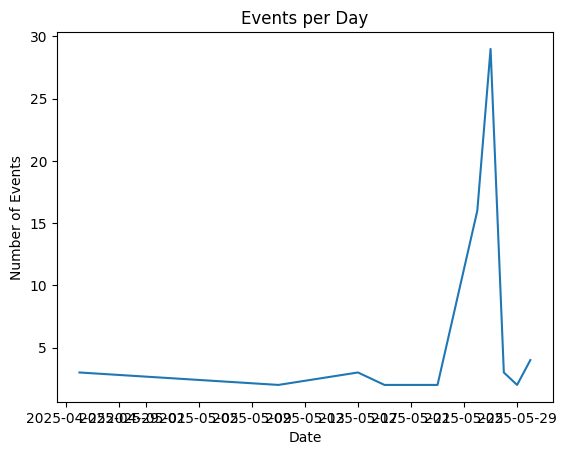

In [6]:
# Events per day
if 'timestamp' in df.columns:
    df['date'] = pd.to_datetime(df['timestamp']).dt.date
    df.groupby('date').size().plot(kind='line', title='Events per Day')
    plt.xlabel('Date')
    plt.ylabel('Number of Events')
    plt.show()

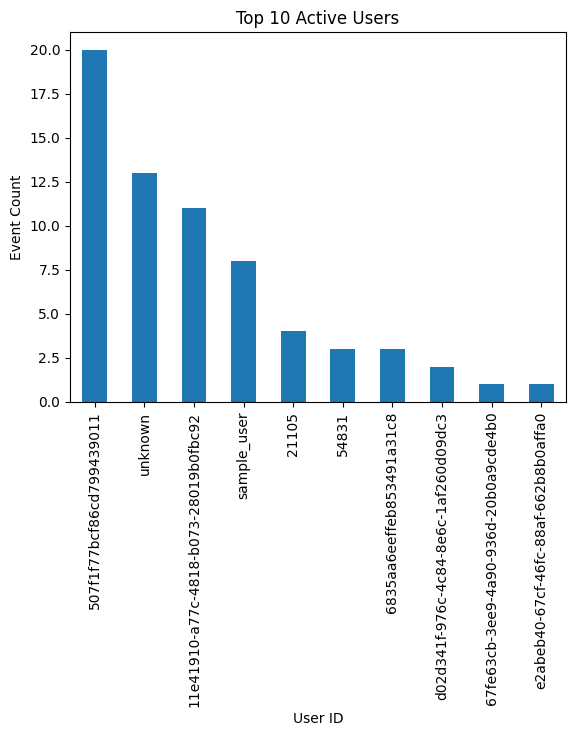

In [7]:
# Top active users
if 'user_id' in df.columns:
    df['user_id'].value_counts().head(10).plot(
        kind='bar', title='Top 10 Active Users')
    plt.xlabel('User ID')
    plt.ylabel('Event Count')
    plt.show()

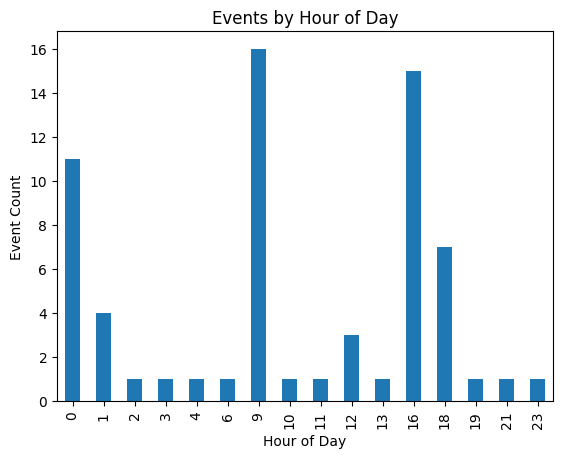

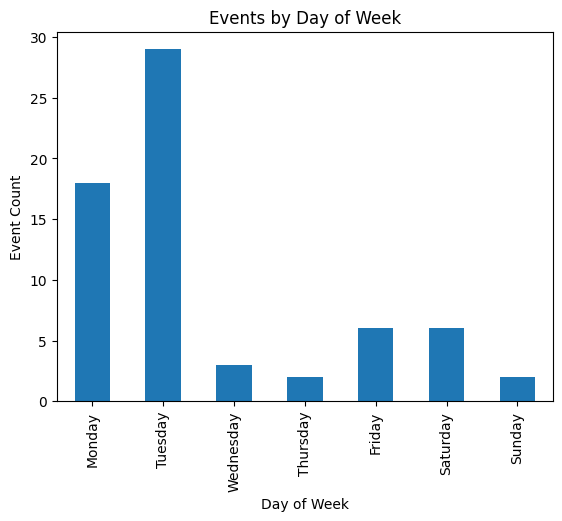

In [8]:
# Events by hour of day
if 'hour_of_day' in df.columns:
    df['hour_of_day'].value_counts().sort_index().plot(
        kind='bar', title='Events by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Event Count')
    plt.show()

# Events by day of week
if 'day_of_week' in df.columns:
    df['day_of_week'].value_counts().reindex(
        ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
            'Friday', 'Saturday', 'Sunday']
    ).plot(kind='bar', title='Events by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Event Count')
    plt.show()

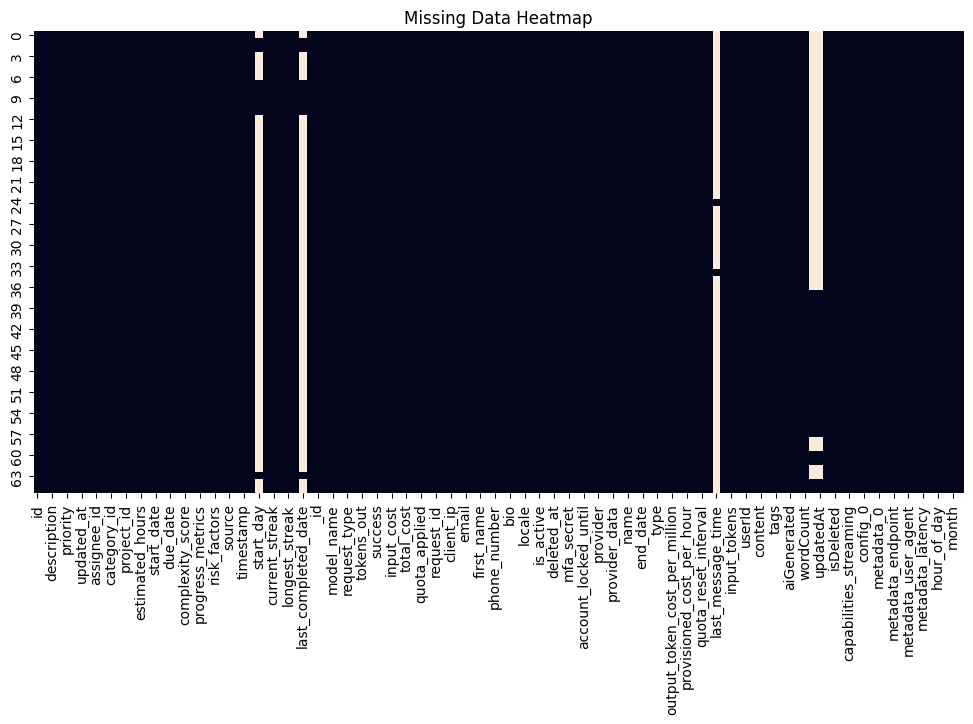

In [9]:
import seaborn as sns

# Visualize missing data
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Data Heatmap')
plt.show()

In [10]:
# Top 10 most common project names
if 'name' in df.columns and 'project' in df['source'].unique():
    print(df[df['source'] == 'project']['name'].value_counts().head(10))

# Top 10 most common habit titles
if 'title' in df.columns and 'habit' in df['source'].unique():
    print(df[df['source'] == 'habit']['title'].value_counts().head(10))

# Top 10 most common task titles
if 'title' in df.columns and 'task' in df['source'].unique():
    print(df[df['source'] == 'task']['title'].value_counts().head(10))

name
Notify Approval    1
Name: count, dtype: int64
title
fuck                   2
drink 3l of water      1
sleep 8 hours a day    1
get sleep              1
fucklk                 1
Multi-Channel Test     1
problem solving        1
Name: count, dtype: int64
title
get out    1
Name: count, dtype: int64


In [11]:
# Number of unique users per month
if 'timestamp' in df.columns and 'user_id' in df.columns:
    df['month_year'] = pd.to_datetime(df['timestamp']).dt.to_period('M')
    print(df.groupby('month_year')['user_id'].nunique())

month_year
2025-04     1
2025-05    10
Freq: M, Name: user_id, dtype: int64


                 timestamp        date
15 2025-05-26 09:49:50.887  2025-05-26
28 2025-05-27 00:29:41.466  2025-05-27
Number of non-null dates: 2
Number of AI events: 2
AI event types: ['ai_model_event']
date
2025-05-26    1
2025-05-27    1
dtype: int64


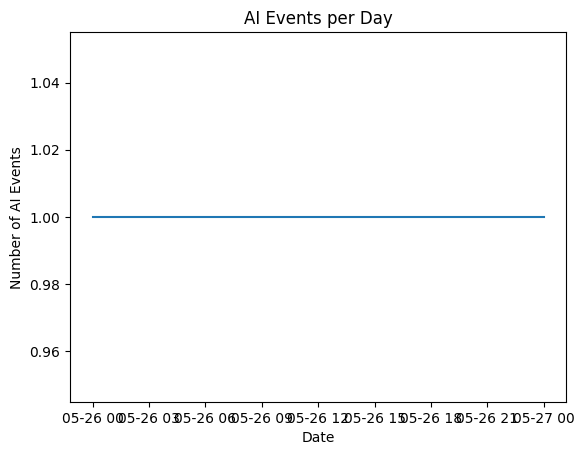

In [12]:
if 'event_type' in df.columns and 'timestamp' in df.columns:
    ai_events = df[df['event_type'].str.contains('ai', na=False)].copy()
    ai_events['date'] = pd.to_datetime(
        ai_events['timestamp'], errors='coerce').dt.date
    print(ai_events[['timestamp', 'date']])
    print("Number of non-null dates:", ai_events['date'].notnull().sum())
    print("Number of AI events:", len(ai_events))
    print("AI event types:", ai_events['event_type'].unique())
    counts = ai_events.groupby('date').size()
    print(counts)
    if not counts.empty:
        counts.plot(kind='line', title='AI Events per Day')
        plt.xlabel('Date')
        plt.ylabel('Number of AI Events')
        plt.show()
    else:
        print('No AI events with valid dates to plot.')

In [13]:
# Most common note titles
if 'title' in df.columns and 'note' in df['source'].unique():
    print(df[df['source'] == 'note']['title'].value_counts().head(10))

# Most common journal titles
if 'title' in df.columns and 'journal' in df['source'].unique():
    print(df[df['source'] == 'journal']['title'].value_counts().head(10))

title
My First Journal Entry                    5
Weekend Trip to the Mountains             3
Difficult Day at Work                     3
Old Memory I Want to Archive              2
My Detailed Travel Journal                2
Testing Invalid Mood                      2
Updated Tit  ppffdff my fuckin journal    2
New Recipe Attempt                        1
AI Assisted Reflection                    1
Updated Journal Entry22                   1
Name: count, dtype: int64


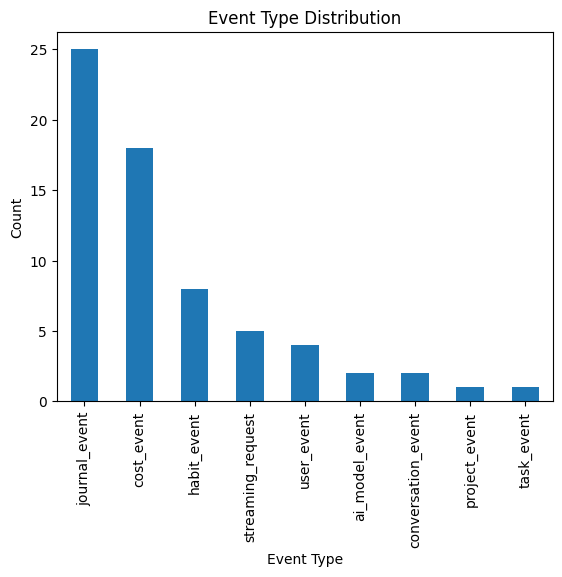

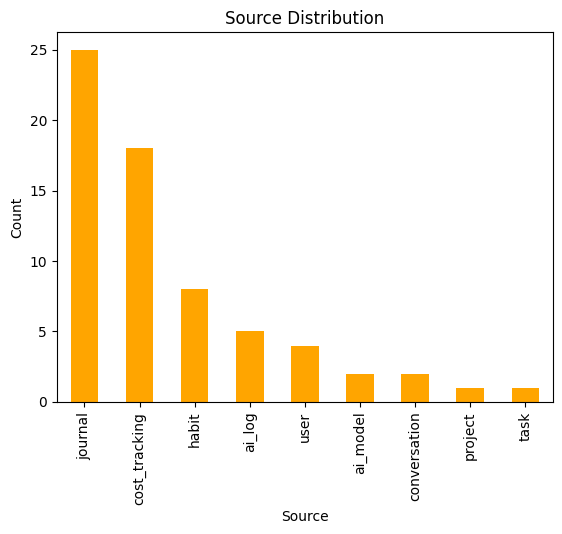

In [15]:
import matplotlib.pyplot as plt

# Event type distribution
df['event_type'].value_counts().plot(
    kind='bar', title='Event Type Distribution')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.show()

# Source distribution
df['source'].value_counts().plot(
    kind='bar', title='Source Distribution', color='orange')
plt.xlabel('Source')
plt.ylabel('Count')
plt.show()

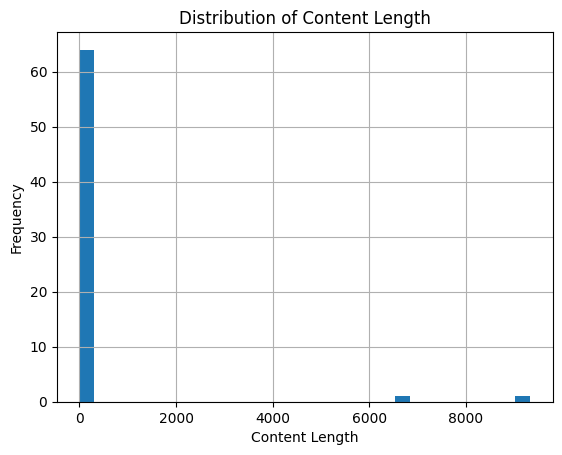

In [16]:
# Distribution of content length
if 'content' in df.columns:
    df['content_length'] = df['content'].astype(str).apply(len)
    df['content_length'].hist(bins=30)
    plt.title('Distribution of Content Length')
    plt.xlabel('Content Length')
    plt.ylabel('Frequency')
    plt.show()